In [2]:
import sys

import numpy as np
import cv2
import matplotlib.pyplot as plt

In [16]:
inputFile = "../images/original_image_up_640.png"

#if len(sys.argv) <= 1:
#	print("No input file given")
#	quit()

#elif (len(sys.argv) == 1):
#	inputFile = sys.argv[1]


outputFile = "../verilog_pixels.txt"



outFD = open(outputFile, "w")


img = np.empty(1)

img = cv2.imread(inputFile)


if img is None:
	print("Error opening img at ", inputFile)
	sys.exit(1)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

v,h,c = img.shape

printStr = f"Loaded image of size {v}, {h} of type {img.dtype}"

for i in range(v):
	for j in range(h):
		r = img[i][j][0]
		g = img[i][j][1]
		b = img[i][j][2]

		r = hex(r)
		g = hex(g)
		b = hex(b)

		outFD.write(f"{r}, {g}, {b}\n")

outFD.close()


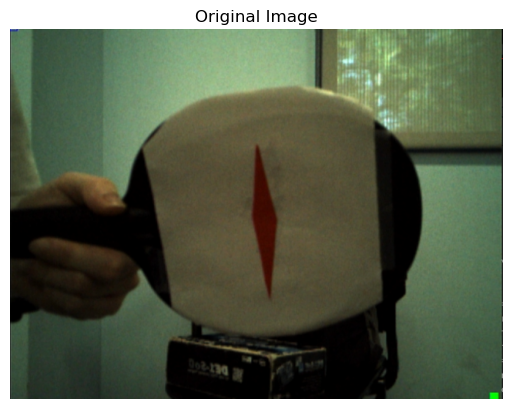

Saved 480 rows of 640 pixels with 0 pixels left over


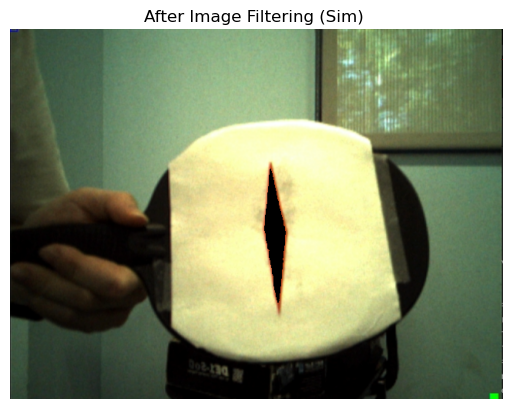

In [18]:
def plotImg(image, title, gray=False, save=False, savePath=None):
	if gray:
		plt.imshow(image, cmap='gray')
	else:
		plt.imshow(image)
	
	plt.title(title)
	plt.axis('off')
	if save:
		str = savePath + ".png"
		plt.savefig(str)
	plt.show()

inputFile = "../images/original_image_up_640.png"
img = cv2.imread(inputFile)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plotImg(img, "Original Image", save=False)


logFile = "../output_pixels.txt"

simFD = open(logFile, "r")


imgOut = np.zeros_like(img)


if img is None:
	print("Error opening img at ", inputFile)
	sys.exit(1)


v,h,c = imgOut.shape

i = 0
j = 0

for line in simFD:
	data = line.split(",")
	if len(data) != 3:
		print(f"Error reading pixel at row {i}, col {j}")
	
	r = int(data[0], 16)
	g = int(data[1], 16)
	b = int(data[2], 16)
	
	imgOut[i][j][0] = r
	imgOut[i][j][1] = g
	imgOut[i][j][2] = b

	j += 1

	if (j >= h):
		j = 0
		i += 1
	

print(f"Saved {i} rows of {h} pixels with {j} pixels left over")

simFD.close()

plotImg(imgOut, "After Image Filtering (Sim) ", save=True, savePath="../images/processedImg")

In [5]:
print(sys.executable)

c:\Users\Philip Kvamme\Projects\eec181\env181\python.exe
